# Car Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data as a Pandas DataFrame

In [2]:
car = pd.read_csv("ML-Essentials/data/Automobile.csv")

### Display the first 5 rows

In [3]:
car.head()

,Unnamed: 0,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


### Removing unnecessary columns

In [4]:
car.set_index('index', inplace=True)
car.drop(["Unnamed: 0"], axis= 1, inplace = True)
car.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


### Cheaking the number of rows and columns

In [5]:
car.shape

(61, 9)

###  Displays a concise summary of the dataframe

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


### Display the missing values in the DataFrame.

In [7]:
car.isna().sum().to_frame().rename(columns={0:"Missing Values"})

,Missing Values
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,3


In [8]:
car[car.isna().any(axis=1)]

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


###  Replacing missing values with the previous valid values


In [9]:
car.fillna(method="ffill", inplace=True)
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             61 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


###  Fetching only the columns with categorical values.

In [10]:
category_cols =car.select_dtypes(["object"]).head()
category_cols

,company,body-style,engine-type,num-of-cylinders
index,,,,
0,alfa-romero,convertible,dohc,four
1,alfa-romero,convertible,dohc,four
2,alfa-romero,hatchback,ohcv,six
3,audi,sedan,ohc,four
4,audi,sedan,ohc,five


In [11]:
for col in category_cols:
    print(car[col].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan' 'porsche' 'toyota'
 'volkswagen' 'volvo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


# Heatmap

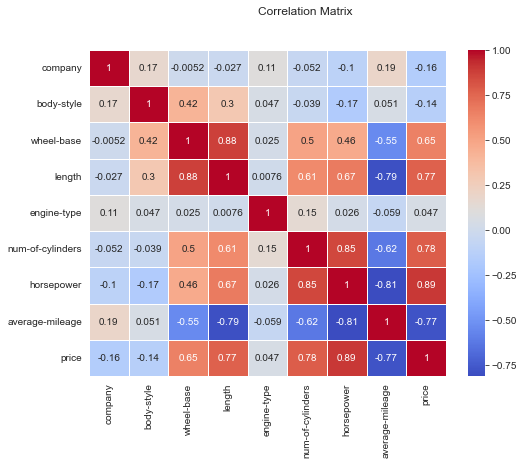

In [23]:
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.heatmap(data=car.corr(),
           annot=True,
           linewidth=0.5,
           cmap="coolwarm")
plt.suptitle("Correlation Matrix")
plt.show()

### Changing categorical data 

In [12]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()

In [13]:
car['company'] = lbl_encoder.fit_transform(car['company'])
car['body-style'] = lbl_encoder.fit_transform(car['body-style'])
car['engine-type'] = lbl_encoder.fit_transform(car['engine-type'])
car.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,four,111,21,13495.0
1,0,0,88.6,168.8,0,four,111,21,16500.0
2,0,2,94.5,171.2,5,six,154,19,16500.0
3,1,3,99.8,176.6,3,four,102,24,13950.0
4,1,3,99.4,176.6,3,five,115,18,17450.0


In [14]:
car = car.replace({'num-of-cylinders':{
    'four':4,
    'six': 6,
    'five': 5,
    'three': 3,
    'twelve': 12,
    'two': 2,
    'eight': 8}
                              })
car.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,4,111,21,13495.0
1,0,0,88.6,168.8,0,4,111,21,16500.0
2,0,2,94.5,171.2,5,6,154,19,16500.0
3,1,3,99.8,176.6,3,4,102,24,13950.0
4,1,3,99.4,176.6,3,5,115,18,17450.0


### Cheaking the correlation

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
car.corr().style.background_gradient(cmap="coolwarm")


,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
company,1.000000,0.171622,-0.005248,-0.027407,0.109381,-0.052472,-0.104871,0.193498,-0.157061
body-style,0.171622,1.000000,0.420375,0.296047,0.046794,-0.039032,-0.168441,0.050702,-0.137076
wheel-base,-0.005248,0.420375,1.000000,0.878381,0.025034,0.499083,0.463421,-0.547325,0.647353
length,-0.027407,0.296047,0.878381,1.000000,0.007572,0.614195,0.668555,-0.788429,0.773591
engine-type,0.109381,0.046794,0.025034,0.007572,1.000000,0.145542,0.026437,-0.059321,0.047293
num-of-cylinders,-0.052472,-0.039032,0.499083,0.614195,0.145542,1.000000,0.852514,-0.622661,0.782531
horsepower,-0.104871,-0.168441,0.463421,0.668555,0.026437,0.852514,1.000000,-0.808804,0.894636
average-mileage,0.193498,0.050702,-0.547325,-0.788429,-0.059321,-0.622661,-0.808804,1.000000,-0.774841
price,-0.157061,-0.137076,0.647353,0.773591,0.047293,0.782531,0.894636,-0.774841,1.000000


<Figure size 504x360 with 0 Axes>

### Data visualization

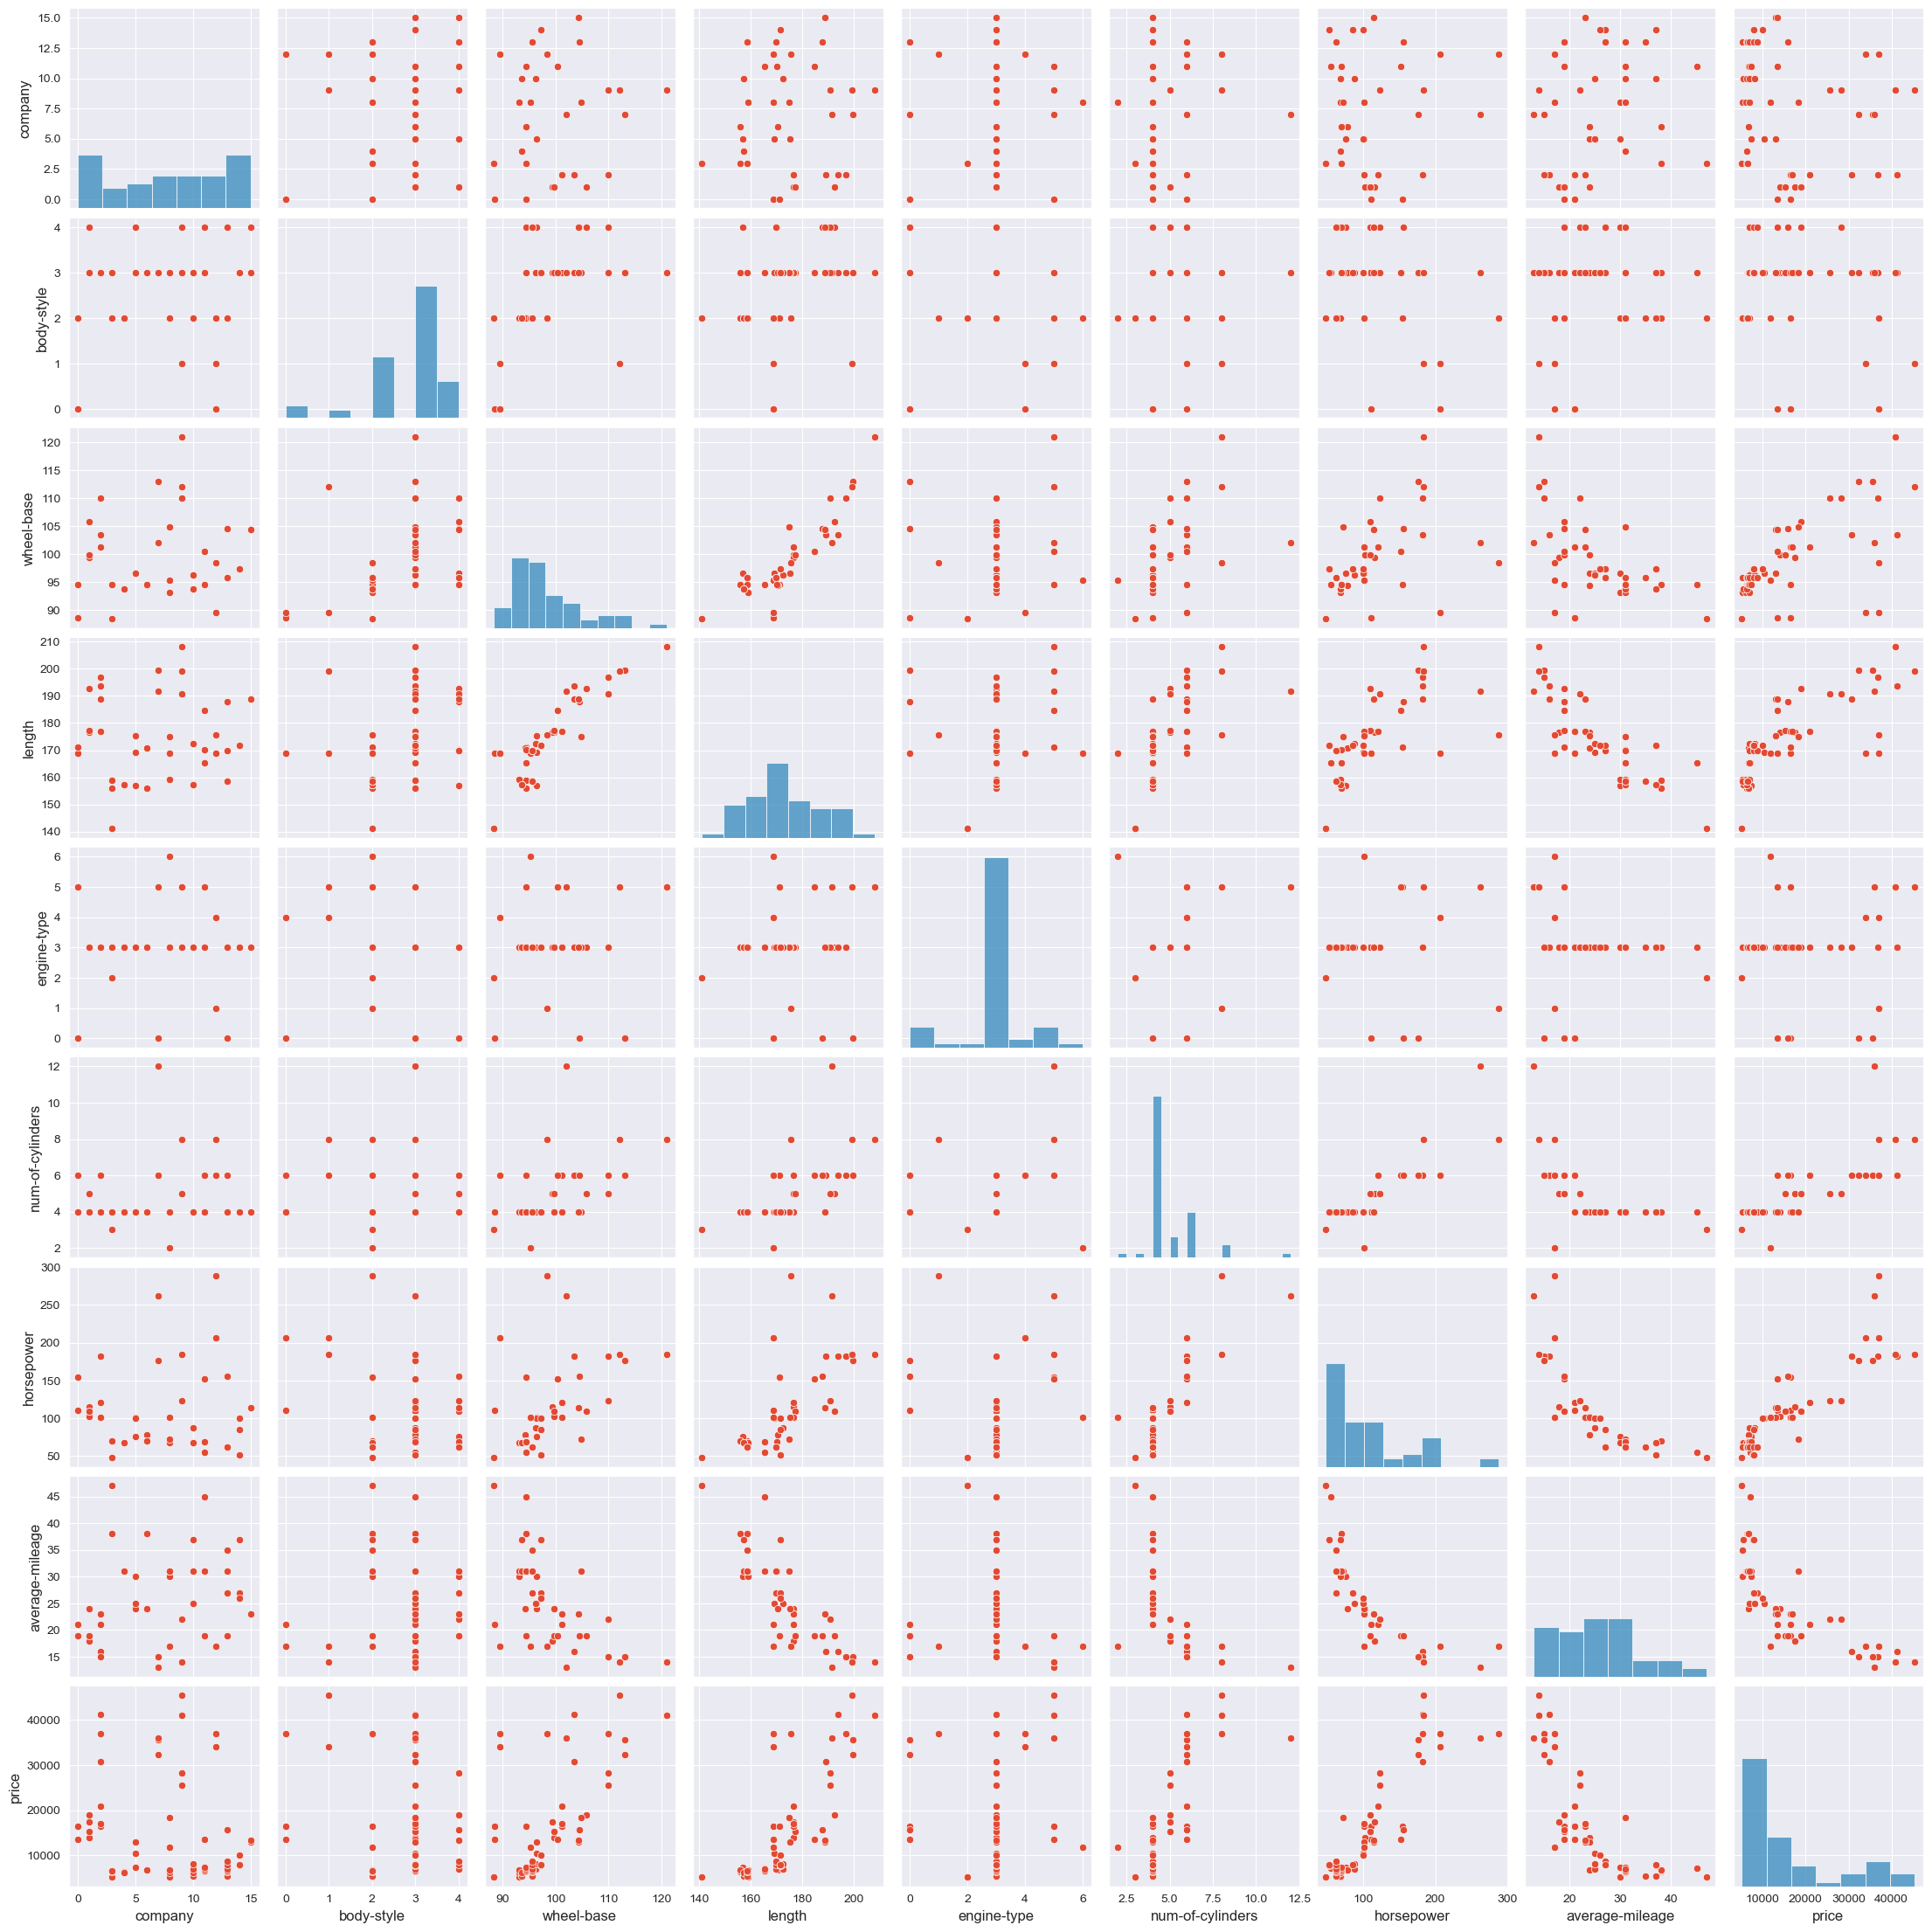

In [136]:
sns.pairplot(car)

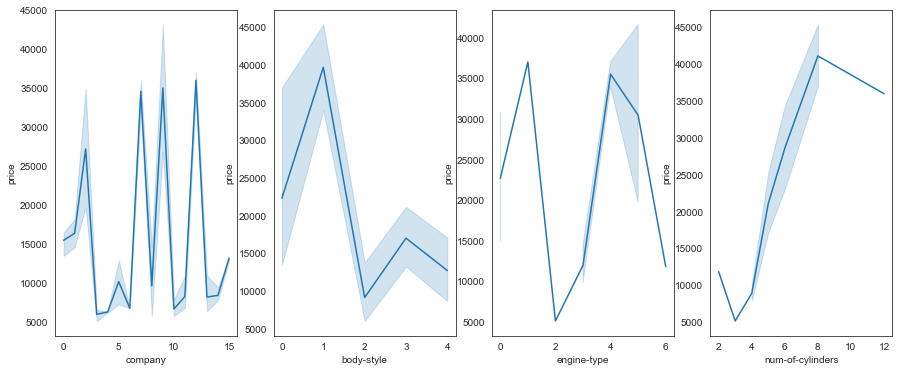

In [18]:
plt.figure(figsize=(15, 6))
sns.set_style("white")
plt.subplot(141)
sns.lineplot(data=car, x="company", y="price")

plt.subplot(142)
sns.lineplot(data=car, x="body-style", y="price")

plt.subplot(143)
sns.lineplot(data=car, x="engine-type", y="price")

plt.subplot(144)
sns.lineplot(data=car, x="num-of-cylinders", y="price")
plt.show()

<AxesSubplot:xlabel='average-mileage', ylabel='price'>

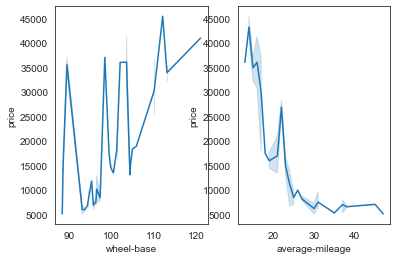

In [19]:
plt.subplot(121)
sns.lineplot(data=car, x="wheel-base", y="price")

plt.subplot(122)
sns.lineplot(data=car, x="average-mileage", y="price")

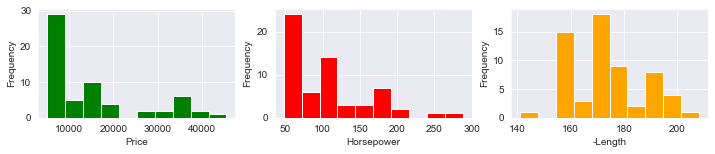

In [20]:
plt.figure(figsize=(12, 2))
sns.set_style('darkgrid')

kwargs = {"kind": "hist", 
          "bins": 10}

plt.subplot(131)
car.price.plot(**kwargs, color="g")
# plt.xticks(rotation="vertical")
plt.xlabel("Price")

plt.subplot(132)
car.horsepower.plot(**kwargs, color="r")
# plt.xticks(ticks=True)
plt.xlabel("Horsepower")

plt.subplot(133)
car.length.plot(**kwargs, color="orange")
# plt.xticks(ticks=True)
plt.xlabel("-Length")

plt.show()

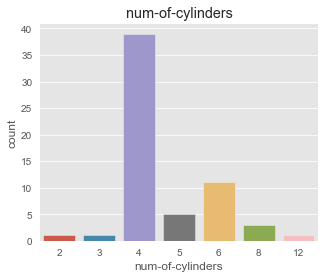

In [21]:
plt.figure(figsize=(5,4))
plt.style.use("ggplot")

sns.countplot(x="num-of-cylinders", data=car)
plt.title('num-of-cylinders')
plt.show()

In [22]:
car.price.skew()

1.1984787118554663

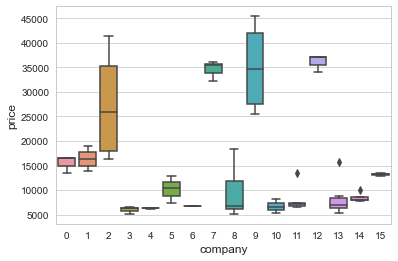

In [23]:
sns.set_style("whitegrid")
sns.boxplot(data=car, x="company", y="price")
plt.show()

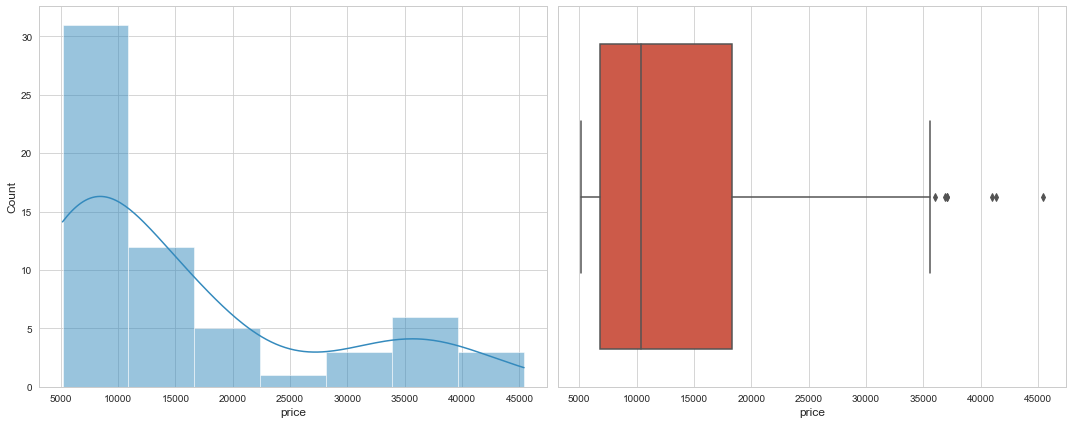

In [24]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
plt.subplot(121)
sns.histplot(data=car, x='price', kde=True)

plt.subplot(122)
sns.boxplot(data=car, x='price')
plt.tight_layout() # the space between the two picture is less
plt.show()

###  Choose target and features

In [15]:
x = car.drop(['company', 'body-style', 'engine-type', 'num-of-cylinders', 'price'], axis=1)
y = car.price

In [16]:
x

,wheel-base,length,horsepower,average-mileage
index,,,,
0,88.6,168.8,111,21
1,88.6,168.8,111,21
2,94.5,171.2,154,19
3,99.8,176.6,102,24
4,99.4,176.6,115,18
...,...,...,...,...
81,97.3,171.7,85,27
82,97.3,171.7,52,37
86,97.3,171.7,100,26


In [17]:
y

index
0     13495.0
1     16500.0
2     16500.0
3     13950.0
4     17450.0
       ...   
81     7975.0
82     7995.0
86     9995.0
87    12940.0
88    13415.0
Name: price, Length: 61, dtype: float64

### Spliting the data into training data and testing data

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, 
                                                   random_state=0)

In [19]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (48, 4)
x_test shape: (13, 4)
y_train shape: (48,)
y_test shape: (13,)


In [20]:
x_train

,wheel-base,length,horsepower,average-mileage
index,,,,
54,94.5,165.3,69,31
45,110.0,190.9,123,22
56,94.5,170.2,69,31
67,95.7,158.7,62,31
9,101.2,176.8,101,23
17,94.5,155.9,70,38
44,110.0,190.9,123,22
69,95.7,169.7,62,31
38,93.1,159.1,68,31


In [21]:
x_test

,wheel-base,length,horsepower,average-mileage
index,,,,
35,102.0,191.7,262,13
47,112.0,199.2,184,14
88,104.3,188.8,114,23
37,93.1,159.1,68,31
14,103.5,193.8,182,16
2,94.5,171.2,154,19
46,120.9,208.1,184,14
87,104.3,188.8,114,23
53,94.5,165.3,55,45


In [22]:
y_train

index
54     6649.0
45    28248.0
56     7349.0
67     6338.0
9     16430.0
17     6295.0
44    25552.0
69     6918.0
38     6795.0
55     6849.0
80     7775.0
27     7295.0
82     7995.0
36     5195.0
18     6575.0
5     15250.0
43    18344.0
19     6377.0
70     7898.0
29    10345.0
86     9995.0
10    16925.0
16     5151.0
34    35550.0
50     6189.0
20     6229.0
61    34028.0
66     5348.0
79    15750.0
51     6989.0
1     16500.0
15    36880.0
62    37028.0
33    32250.0
6     18920.0
32     6785.0
49     5389.0
68     6488.0
30     6785.0
28    12945.0
11    20970.0
52     8189.0
81     7975.0
3     13950.0
0     13495.0
71     8778.0
63    37028.0
57    13499.0
Name: price, dtype: float64

In [23]:
y_test

index
35    36000.0
47    45400.0
88    13415.0
37     6095.0
14    41315.0
2     16500.0
46    40960.0
87    12940.0
53     7099.0
31     6785.0
4     17450.0
13    30760.0
39    11845.0
Name: price, dtype: float64

### Importing and fitting the model on training data

In [24]:
from sklearn.linear_model import LinearRegression

car_model = LinearRegression()
car_model.fit(x_train, y_train)

LinearRegression()

### Checking the slope m and the intercept c

In [25]:
m = car_model.coef_
c = car_model.intercept_

m,c

(array([304.18215131,  82.86123881, 160.66583917,  49.52218689]),
 -47550.67264743209)

### Predicting the target: price against the predictors in the training data set
### predicting on training data

In [26]:
y_pred_train = car_model.predict(x_train)
y_pred_train

array([ 7512.63412394, 22578.9608162 ,  7918.65419412,  6206.10765514,
       15248.68814248,  7241.05962651, 22578.9608162 ,  7117.58128208,
        6412.37359229,  7512.63412394,  6460.46993143,  8516.67495562,
        6460.46993143,  6362.8514054 ,  7481.35721907, 16112.16755504,
       11961.8800316 ,  6445.73265322,  6919.49253452, 13119.37902706,
       13627.68615591, 15248.68814248,  1070.2533893 , 32381.03421573,
        6445.73265322,  6445.73265322, 27768.59901645,  6404.19640271,
       25802.49527568, 11403.9946148 , 12260.71714337, 32217.04357591,
       27768.59901645, 32381.03421573, 19213.32354063,  7241.05962651,
        6742.86577456,  6206.10765514,  8998.58562758, 13752.54848386,
       18362.96055215, 11403.9946148 , 11267.22075521, 15016.44890894,
       12260.71714337,  6919.49253452, 44053.20956006, 23647.52913441])

### Predicting the target: price against the predictors in the testing data set
### predicting on validation data

In [27]:
y_pred_test = car_model.predict(x_test)
y_pred_test

array([42098.64455973, 33279.51209538, 19274.64358654,  6412.37359229,
       30024.22581506, 21063.84551992, 36724.1982675 , 19274.64358654,
        5956.622992  ,  7241.05962651, 16686.29883631, 29626.49186876,
       12510.56266564])

### Mean squared error

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred_test)

32979992.631170686

### Accuracy

In [29]:
accuracy = r2_score(y_test, y_pred_test)
print("the model has an accuracy of", accuracy*100)

the model has an accuracy of 83.31226270770993


## r2_score 

In [30]:
r2score_train= r2_score(y_train, y_pred_train)
r2score_train

0.8649045690188503

In [31]:
r2score_test= r2_score(y_test, y_pred_test)
r2score_test

0.8331226270770994

### Visualize the actual price and predicted price

In [32]:
car_df = pd.DataFrame({"Actual": y_test,
                       "Predicted": y_pred_test,
                       "Error": abs(y_test-y_pred_test)})

car_df.head().style.background_gradient(cmap="RdYlGn")

,Actual,Predicted,Error
index,,,
35,36000.000000,42098.644560,6098.644560
47,45400.000000,33279.512095,12120.487905
88,13415.000000,19274.643587,5859.643587
37,6095.000000,6412.373592,317.373592
14,41315.000000,30024.225815,11290.774185


In [33]:
car_df.Error.describe()


count       13.000000
mean      4229.417174
std       4043.475186
min        317.373592
25%        763.701164
50%       4235.801733
75%       6098.644560
max      12120.487905
Name: Error, dtype: float64

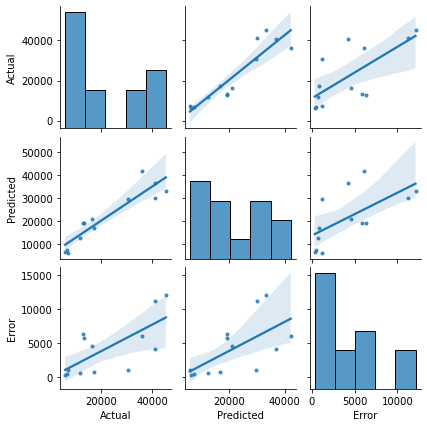

In [34]:
sns.pairplot(car_df.iloc[0:], kind="reg", height=2, markers=".")

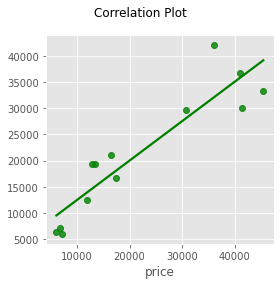

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(4, 4))
sns.regplot(x=y_test, 
            y=y_pred_test, 
            ci=None, 
            color="g")

plt.suptitle("Correlation Plot")
plt.tight_layout()
plt.show()

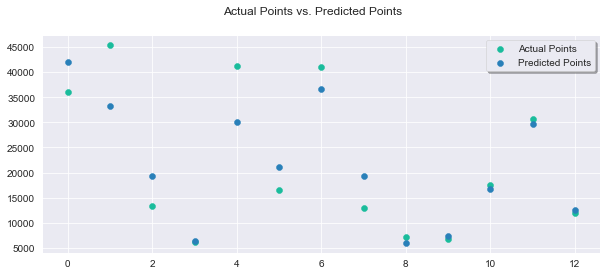

In [36]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')

plt.scatter(x=range(13),
           y=y_test.head(13),
           color="#1abc9c",
           label="Actual Points")
plt.scatter(x=range(13),
           y=y_pred_test[:13],
           color="#2980b9",
           label="Predicted Points")

plt.suptitle("Actual Points vs. Predicted Points")
plt.legend(shadow=True,
           loc="best")
plt.show()

## Comparing "Actual" vs "Predicted" on Testing Data using Kde 

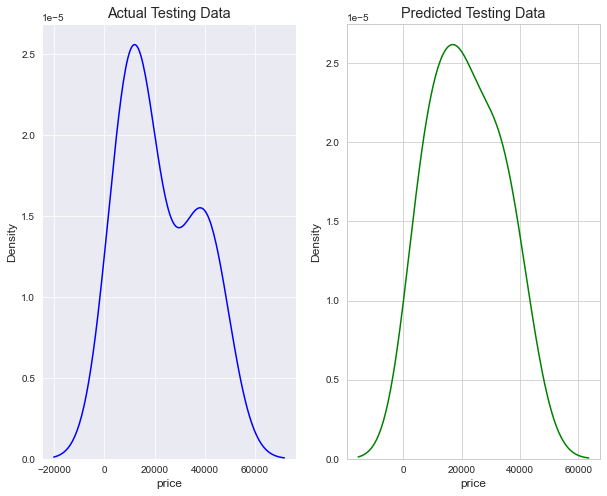

In [39]:
# Actual
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
sns.set_style('whitegrid')
plt.title('Actual Testing Data')
plt.xlabel('price')
sns.kdeplot(y_test, color='b')

# Predicted
plt.subplot(1, 2, 2)
sns.set_style('whitegrid')
plt.title('Predicted Testing Data')
plt.xlabel('price')
sns.kdeplot(y_pred_test, color='g')
plt.show()

plt.close()

In [37]:
x_test.tail()

,wheel-base,length,horsepower,average-mileage
index,,,,
53,94.5,165.3,55,45
31,94.5,155.9,70,38
4,99.4,176.6,115,18
13,103.5,189.0,182,16
39,95.3,169.0,101,17


In [38]:
y_test.tail()

index
53     7099.0
31     6785.0
4     17450.0
13    30760.0
39    11845.0
Name: price, dtype: float64

### Let's predict on the new data

In [169]:
features = pd.DataFrame({'wheel-base':[100, 103.5], 
 'length':[177, 189.0], 
 'horsepower':[117, 182], 
 'average-mileage':[20, 16]}, index=[0, 1])

features

,wheel-base,length,horsepower,average-mileage
0,100.0,177.0,117,20
1,103.5,189.0,182,16


In [170]:
car_model.predict(features)


array([17322.32867475, 29626.49186876])